In [1]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn import metrics

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import time

# <p style="color: #6c89c6;">Работу выполнил: Таратин Артём ПМ22-1</p>

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

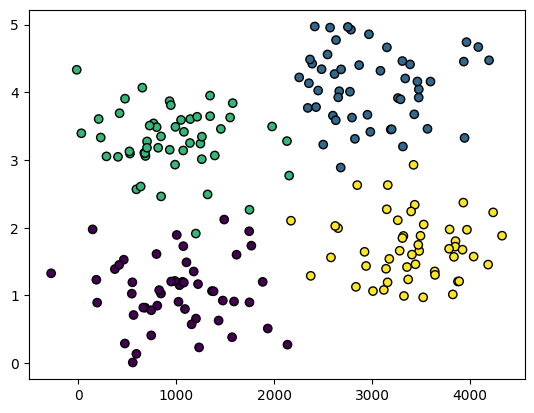

In [3]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(
    n_samples=200, 
    centers=blob_centers, 
    cluster_std=0.5,
    random_state=0
)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [4]:
clf = MLPClassifier(hidden_layer_sizes=(6,), random_state=1).fit(X, y)

In [5]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [6]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [7]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [8]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

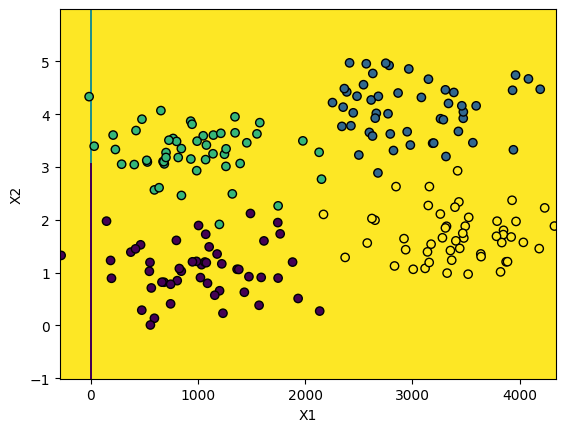

In [9]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

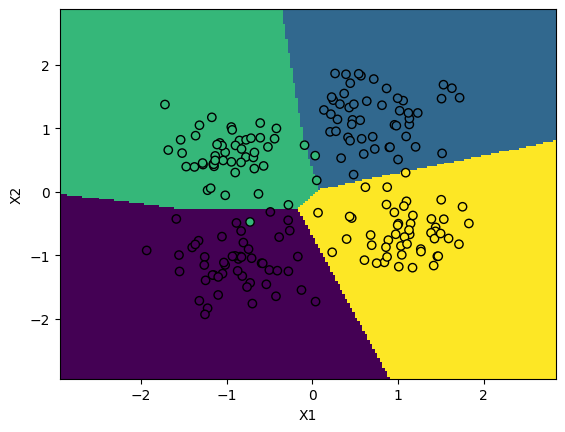

In [12]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10000).fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

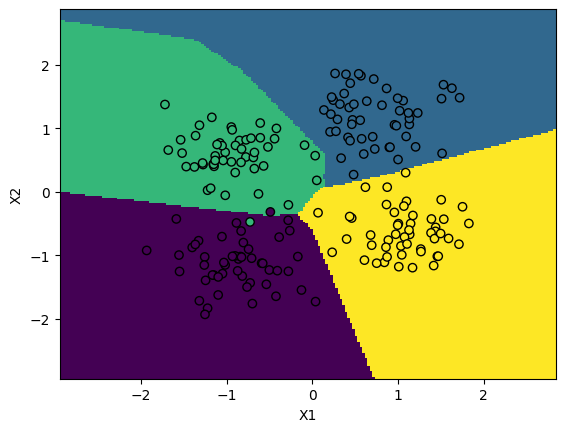

In [13]:
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10_000).fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Задания для самостоятельного выполнения

## 1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

Количество нейронов: 1, Точность: 0.2
Количество нейронов: 2, Точность: 0.5
Количество нейронов: 10, Точность: 1.0
Количество нейронов: 100, Точность: 1.0


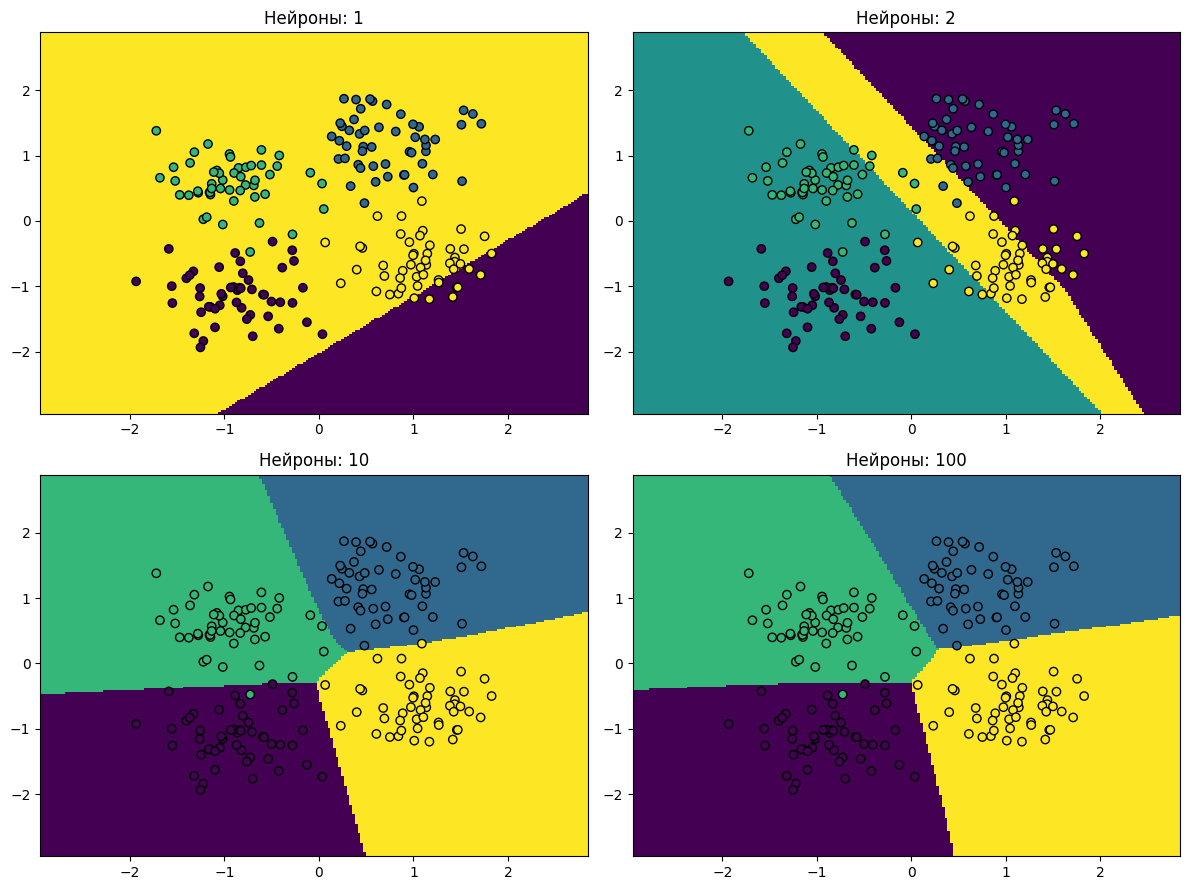

In [15]:
plt.subplots(2, 2, figsize=(12, 9))
for num, neurons in enumerate([1, 2, 10, 100], start=1):
    clf = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=10_000).fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test)
    print(f"Количество нейронов: {neurons}, Точность: {accuracy}")

    X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
    X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)

    plt.subplot(2, 2, num)
    plt.pcolormesh(X0_grid, X1_grid, y_predict, shading='auto')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
    plt.title(f"Нейроны: {neurons}")
    
plt.tight_layout()
plt.show()

### Вывод: Исходя из проведенного теста, можно сказать что 2х нейронов недостаточно, но они вполне справляются с поставленной задачей, соответственно оптимальное количество 10 нейронов

## 2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

Количество скрытых слоёв: 1, Точность: 0.95
Количество скрытых слоёв: 2, Точность: 1.0
Количество скрытых слоёв: 3, Точность: 0.95
Количество скрытых слоёв: 10, Точность: 0.975


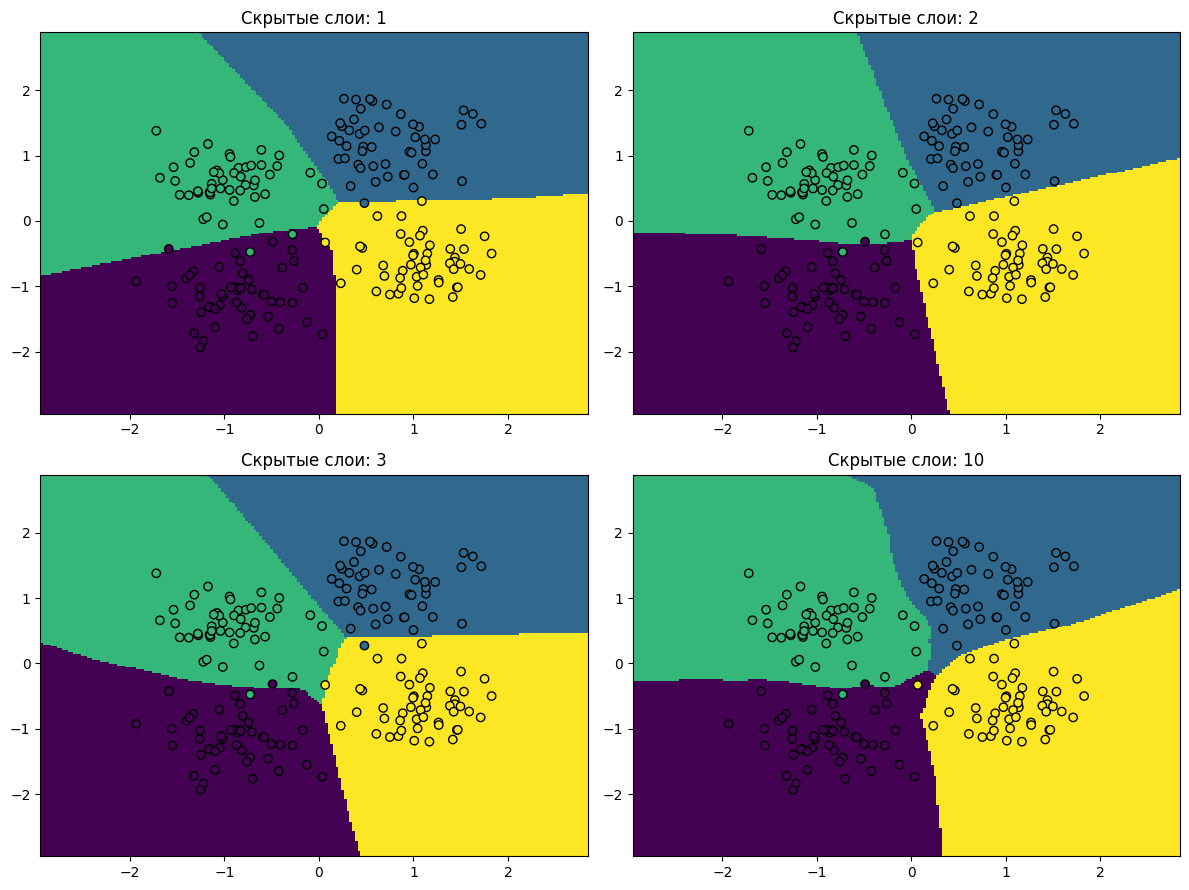

In [16]:
neurons_number = 10
plt.subplots(2, 2, figsize=(12, 9))
for num, hidden_layer in enumerate([1, 2, 3, 10], start=1):
    clf = MLPClassifier(hidden_layer_sizes=[neurons_number]*hidden_layer, max_iter=10_000).fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test)
    print(f"Количество скрытых слоёв: {hidden_layer}, Точность: {accuracy}")

    X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
    X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)

    plt.subplot(2, 2, num)
    plt.pcolormesh(X0_grid, X1_grid, y_predict, shading='auto')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
    plt.title(f"Скрытые слои: {hidden_layer}")
    
plt.tight_layout()
plt.show()

### Вывод: Если при увеличении количества нейронов в одном слое мы получали более высокую точность, то при увеличении количества слоёв для определённого количества нейронов, мы получаем обратную ситуацию - модель с 3-мя слоями стала предсказывать хуже по точности чем с меньшим количеством

## 3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [17]:
data = {
    'inputs': [f'i{i+1}' for i in range(2)],
    **{f'hidden_layer_{l_num}': [f'hl{l_num}_{i+1}' for i in range(neurons_number)] for l_num in range(10)},
    'outputs': [f'o{i+1}' for i in range(4)],
}

max_len = len(max(data.values(), key=len))
strings = ['']*max_len

for item, value in data.items():
    data[item] = [''] * ((max_len - len(value)) // 2) + value + [''] * (max_len - len(value) - (max_len - len(value)) // 2)

keys = data.keys()
print()
for row in range(max_len):
    print('---'.join([f'{data[key][row]:^7}' for key in keys]))
print()


       --- hl0_1 --- hl1_1 --- hl2_1 --- hl3_1 --- hl4_1 --- hl5_1 --- hl6_1 --- hl7_1 --- hl8_1 --- hl9_1 ---       
       --- hl0_2 --- hl1_2 --- hl2_2 --- hl3_2 --- hl4_2 --- hl5_2 --- hl6_2 --- hl7_2 --- hl8_2 --- hl9_2 ---       
       --- hl0_3 --- hl1_3 --- hl2_3 --- hl3_3 --- hl4_3 --- hl5_3 --- hl6_3 --- hl7_3 --- hl8_3 --- hl9_3 ---       
       --- hl0_4 --- hl1_4 --- hl2_4 --- hl3_4 --- hl4_4 --- hl5_4 --- hl6_4 --- hl7_4 --- hl8_4 --- hl9_4 ---  o1   
  i1   --- hl0_5 --- hl1_5 --- hl2_5 --- hl3_5 --- hl4_5 --- hl5_5 --- hl6_5 --- hl7_5 --- hl8_5 --- hl9_5 ---  o2   
  i2   --- hl0_6 --- hl1_6 --- hl2_6 --- hl3_6 --- hl4_6 --- hl5_6 --- hl6_6 --- hl7_6 --- hl8_6 --- hl9_6 ---  o3   
       --- hl0_7 --- hl1_7 --- hl2_7 --- hl3_7 --- hl4_7 --- hl5_7 --- hl6_7 --- hl7_7 --- hl8_7 --- hl9_7 ---  o4   
       --- hl0_8 --- hl1_8 --- hl2_8 --- hl3_8 --- hl4_8 --- hl5_8 --- hl6_8 --- hl7_8 --- hl8_8 --- hl9_8 ---       
       --- hl0_9 --- hl1_9 --- hl2_9 --- hl3_9 --- hl4_

In [18]:
for i in range(len(clf.coefs_)):
    print(f"Слой {i + 1}:")
    for j in range(clf.coefs_[i].shape[0]):
        for k in range(clf.coefs_[i].shape[1]):
            weight = clf.coefs_[i][j, k]
            print(f"Вес между нейроном {j + 1} в слое {i} и нейроном {k + 1} в слое {i + 1}: {weight}")
    
    bias = clf.intercepts_[i]
    print(f"Вектор весов смещения для слоя {i + 1}: {bias}\n")

Слой 1:
Вес между нейроном 1 в слое 0 и нейроном 1 в слое 1: 0.013246093492663234
Вес между нейроном 1 в слое 0 и нейроном 2 в слое 1: -0.8553733547737513
Вес между нейроном 1 в слое 0 и нейроном 3 в слое 1: 0.7020977052390913
Вес между нейроном 1 в слое 0 и нейроном 4 в слое 1: 0.6191304760301758
Вес между нейроном 1 в слое 0 и нейроном 5 в слое 1: -0.00026855575438341985
Вес между нейроном 1 в слое 0 и нейроном 6 в слое 1: 0.42723666564310164
Вес между нейроном 1 в слое 0 и нейроном 7 в слое 1: 0.7260971977960985
Вес между нейроном 1 в слое 0 и нейроном 8 в слое 1: -0.22177725713603935
Вес между нейроном 1 в слое 0 и нейроном 9 в слое 1: 0.3278410284674522
Вес между нейроном 1 в слое 0 и нейроном 10 в слое 1: 0.763273291320546
Вес между нейроном 2 в слое 0 и нейроном 1 в слое 1: 0.4168753299341973
Вес между нейроном 2 в слое 0 и нейроном 2 в слое 1: -0.4309694959475069
Вес между нейроном 2 в слое 0 и нейроном 3 в слое 1: 0.8979770912445451
Вес между нейроном 2 в слое 0 и нейроном 4 в

## 4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [19]:
from mlxtend.plotting import plot_decision_regions

In [20]:

X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=25,
    cluster_std=0.5,
    random_state=0
)

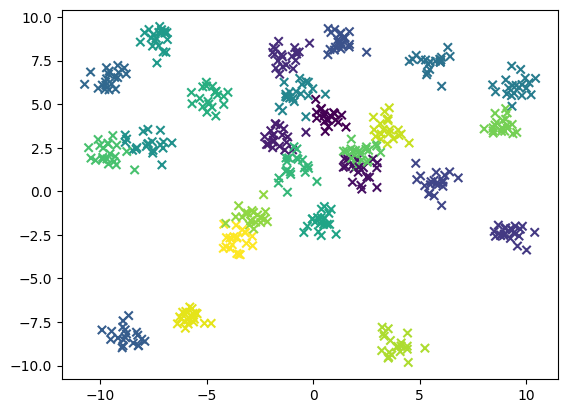

In [21]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, marker='x')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
model = MLPClassifier(hidden_layer_sizes=(200, 100, 50, 20), max_iter=1000, random_state=1)

start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

accuracy = model.score(X_test, y_test)

print(f"Точность: {accuracy}")
print(f"Время обучения: {end_time - start_time:.4f} секунд\n")

Точность: 0.98
Время обучения: 1.3751 секунд



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

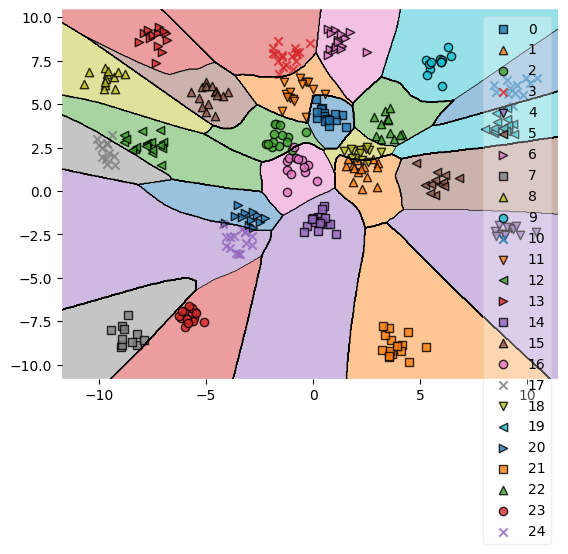

In [24]:
plot_decision_regions(X_train, y_train, clf=model)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

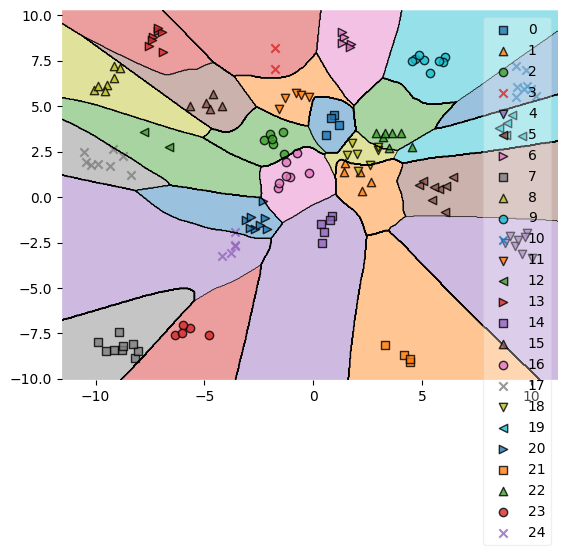

In [25]:
plot_decision_regions(X_test, y_test, clf=model)

## 5. Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

In [27]:
dataset = fetch_openml('ESL', parser='auto', version=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

mlp = MLPClassifier(hidden_layer_sizes=(250,250,), max_iter=10_000, random_state=1)
mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9866666666666667

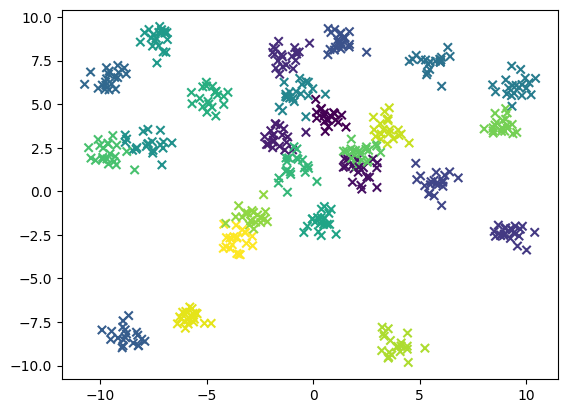

In [29]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, marker='x')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

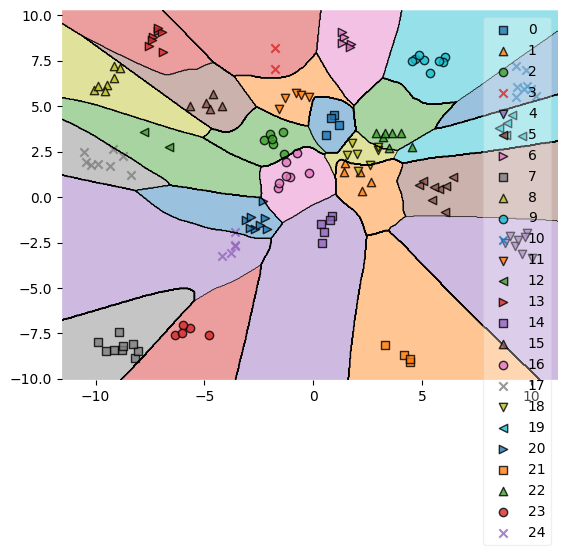

In [30]:
plot_decision_regions(X_test, y_test, clf=model)

## 6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

In [32]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,80,), max_iter=10_000, random_state=1)
mlp_regressor.fit(X_train, y_train)

predictions = mlp_regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

mse, r2

(6.56685986398516, 0.863453524329818)